# TMP exploration

In [ ]:
import torch
all_scores = torch.load('tmp_scores.pt', map_location=torch.device('cpu'))

In [ ]:
len(all_scores[0])

In [ ]:
scores = all_scores[0]

In [ ]:
scores.shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(scores[1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

In [ ]:
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(scores.reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

In [ ]:
import torch
all_E = torch.load('tmp_E.pt', map_location=torch.device('cpu'))

In [ ]:
E, E_v = all_E[0]

In [ ]:
E.shape

In [ ]:
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(E.reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

---
---
---

# Visualize experiments results

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
#import seaborn as sns

/scratch2/clear/ejehanno/miniconda3/envs/graphgps_/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


You can chose to study a run among these:

In [3]:
!ls /scratch2/clear/ejehanno/models_weights/

 odd
 pcqm4m_subset-GraphiT_EJ_Q+K_V+E_multi-Q+K_V+E_multi_DptConn_4seeds
 zinc-GraphiT_EJ_E_multi_V+E_multi-E_multi_V+E_multi_DptConn_4seeds
 zinc-GraphiT_EJ_Q+K+E_multi_V+E_multi_noHeads-Q+K+E_multi_V+E_multi_DptConn_noHeads_4seeds
 zinc-GraphiT_EJ_Q+K+E_multi_V+E_multi_noHeads_DoubleScaling-Q+K+E_multi_V+E_multi_DptConn_noHeads_DoubleScaling_4seeds
 zinc-GraphiT_EJ_Q+K+E_multi_VE_multi_noHeads_DoubleScaling-Q+K+E_multi_VE_multi_DptConn_noHeads_DoubleScaling_4seeds
 zinc-GraphiT_EJ_QK+E_mono_V+E_multi-QK+E_mono_V+E_multi_DptConn_4seeds
 zinc-GraphiT_EJ_QK+E_mono_V-QK+E_mono_V_DptConn_4seeds
 zinc-GraphiT_EJ_QK+E_multi_V+E_multi_AdjMask-QK+E_multi_V+E_multi_DptConn_AdjMask_4seeds
 zinc-GraphiT_EJ_QK+E_multi_V+E_multi_AdjMask_noRings-QK+E_multi_V+E_multi_DptConn_AdjMask_noCoalesce_4seeds
 zinc-GraphiT_EJ_QK+E_multi_V+E_multi_AdjMask_noRings-QK+E_multi_V+E_multi_DptConn_AdjMask_noRings_4seeds
'zinc-GraphiT_EJ_tests-E*V+E_DptConn_4seeds'
'zinc-GraphiT_EJ_tests-Q+K+E_multi*V*E_multi_DptCo

By relaunching
```bash
python main.py --cfg /scratch2/clear/ejehanno/models_weights/zinc-GraphiT_EJ_Q+K+E_multi_V+E_multi_noHeads_DoubleScaling-Q+K+E_multi_V+E_multi_DptConn_noHeads_DoubleScaling_4seeds/\(Q+K+E_multi\)\*\(V+E_multi\)_DptConn_noHeads_DoubleScaling_4seeds/config.yaml train.auto_resume True
```
Or Whatever

In [33]:
def extractor(xp_name):
    # '(QK+E)*(V+E)_multi_DptHead' # cfg.wandb.name
    main_path = '/scratch2/clear/ejehanno/extracted/'
    extracted_path = os.path.join(main_path, xp_name)
    all_scores = torch.load(os.path.join(extracted_path, 'scores.pt'),
                            map_location=torch.device('cpu'))
    all_E = torch.load(os.path.join(extracted_path, 'Ea.pt'),
                            map_location=torch.device('cpu'))
    all_Ev = torch.load(os.path.join(extracted_path, 'Ev.pt'),
                            map_location=torch.device('cpu'))
    batch = torch.load(os.path.join(extracted_path, 'batch.pt'),
                            map_location=torch.device('cpu'))
    return all_scores, all_E, all_Ev, batch

In [ ]:
all_scores, all_E, all_Ev, batch = extractor('(Q+K+E_multi)*(V+E_multi)_DptConn_noHeads_DoubleScaling_4seeds')

## Exploration of the techniques

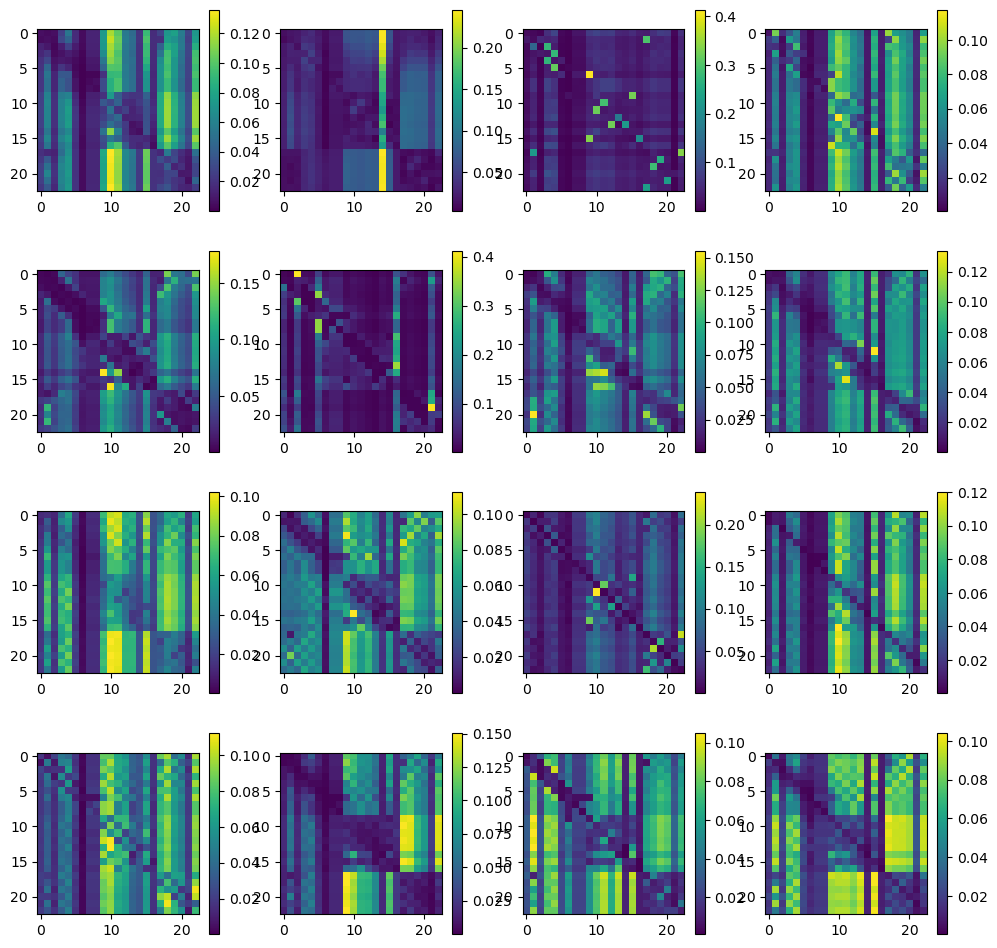

In [7]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

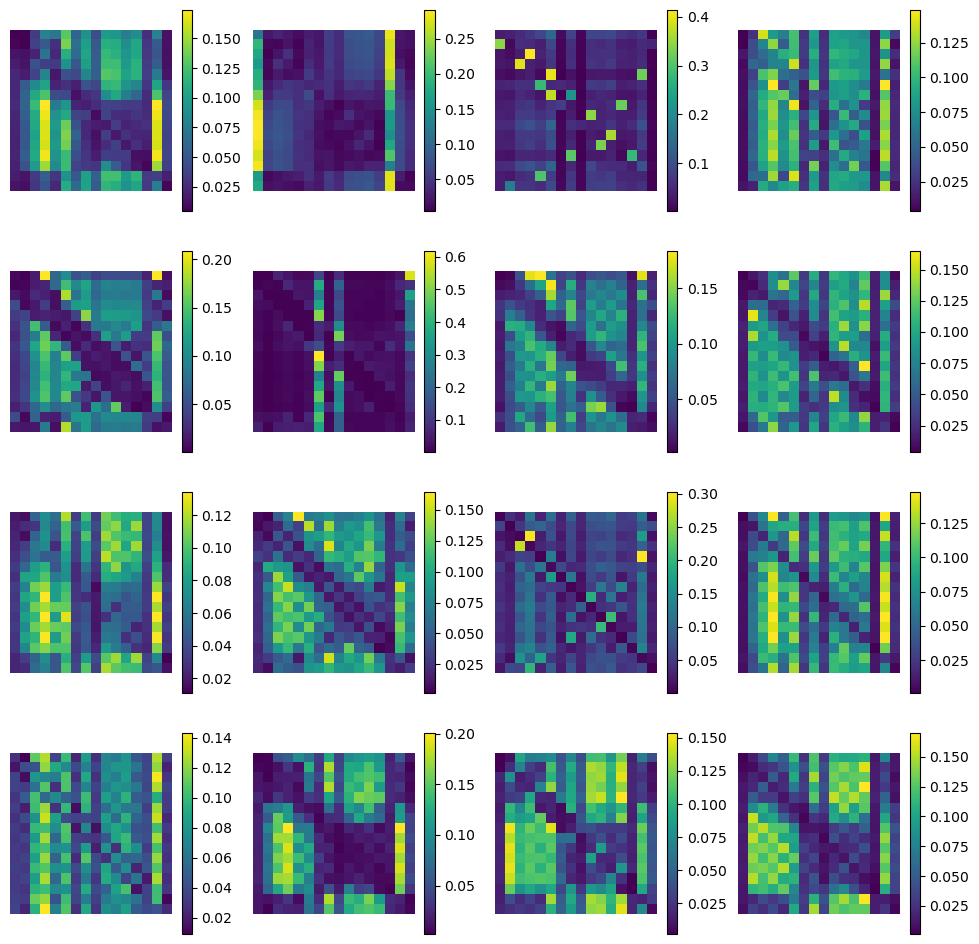

In [8]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][0,:16,:16,0,idx].numpy())
    plt.colorbar()
    plt.axis('off')
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

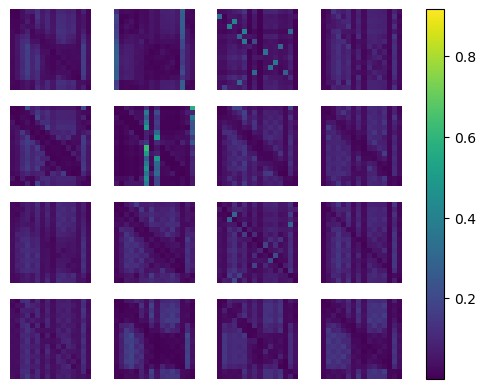

In [9]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
fig, axes = plt.subplots(nrows=4, ncols=4)
cmap=cm.get_cmap('viridis')
normalizer=Normalize(all_scores[0][0,:16,:16,0,:].min(),all_scores[0][0,:16,:16,0,:].max())
im=cm.ScalarMappable(norm=normalizer)
for idx, ax in enumerate(axes.flat):
    im = ax.imshow(all_scores[0][0,:16,:16,0,idx].numpy(),cmap=cmap,norm=normalizer)
    #plt.colorbar()
    ax.axis('off')
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

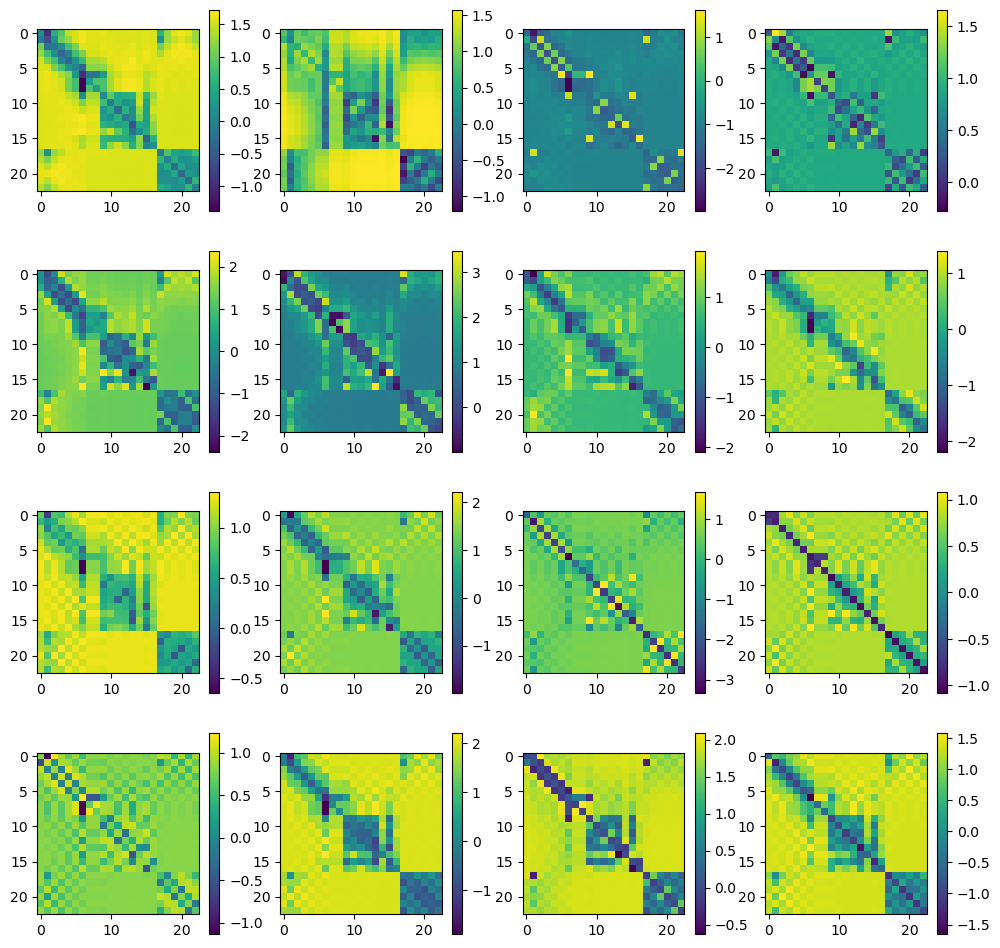

In [10]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_E[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

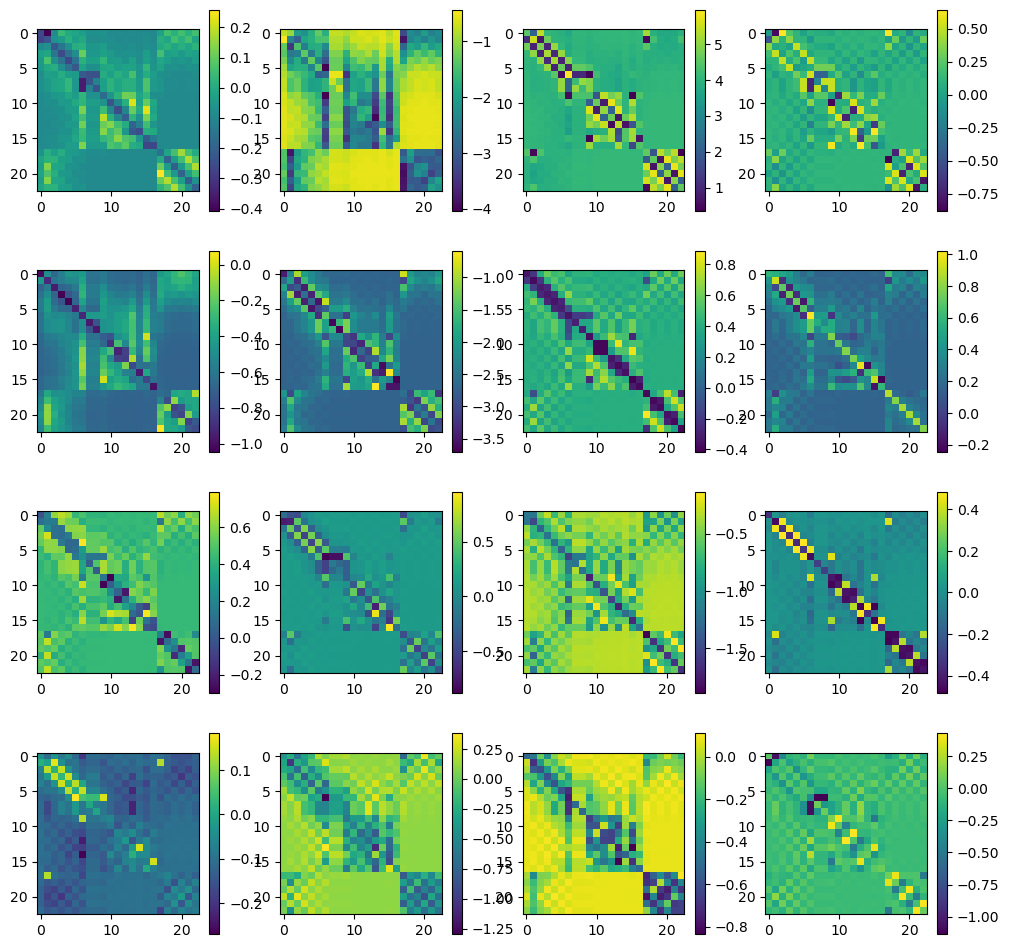

In [11]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_Ev[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

In [34]:
plt.figure(figsize=(12,12))
for idx in range(4):
    loc_scores = all_scores[0].reshape(32, 31, 31, -1)
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==idx][1].numpy()
    transparency = np.ones(23) * 6 # 6
    transparency[neighbors] += 2 # 8
    transparency = np.repeat(transparency.reshape(-1,1), repeats=loc_scores.shape[-1], axis=1)
    plt.subplot(4,1,idx+1)
    cmap = plt.colorbar('viridis')
    plt.imshow(loc_scores[1,idx,:23,:].numpy(), alpha=transparency*.1, cmap=cmap)
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

/tmp/ipykernel_4679/1498660919.py:10: MatplotlibDeprecationWarning: The 'alpha' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(alpha=transparency*.1)


ValueError: Data array shape, (256,) is incompatible with alpha array shape, (23, 64). This can occur with the deprecated behavior of the "flat" shading option, in which a row and/or column of the data array is dropped.

<Figure size 1200x1200 with 8 Axes>

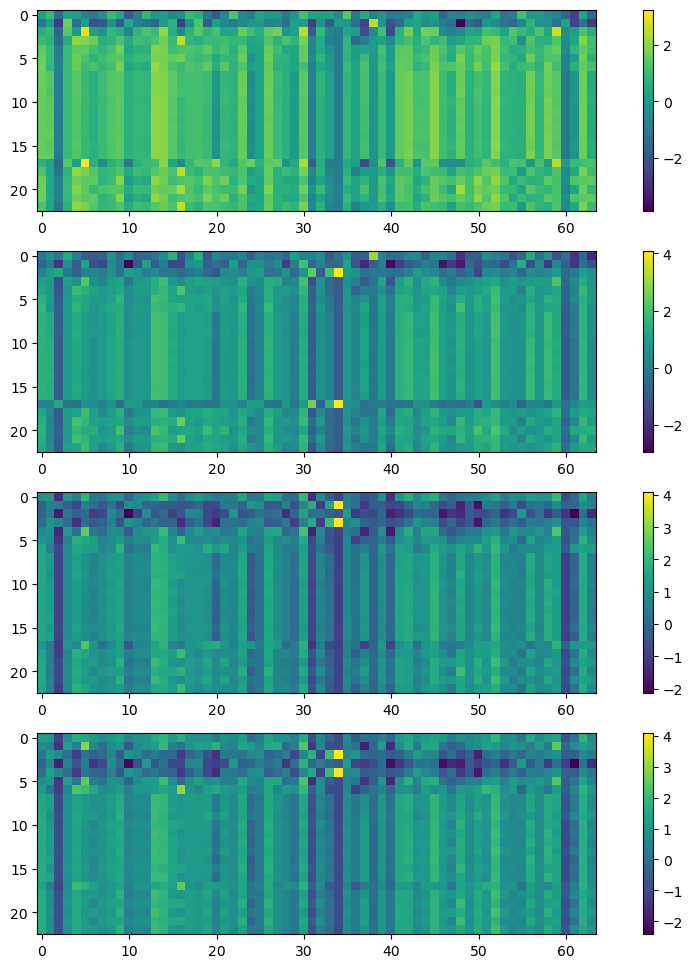

In [13]:
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(all_E[0].reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

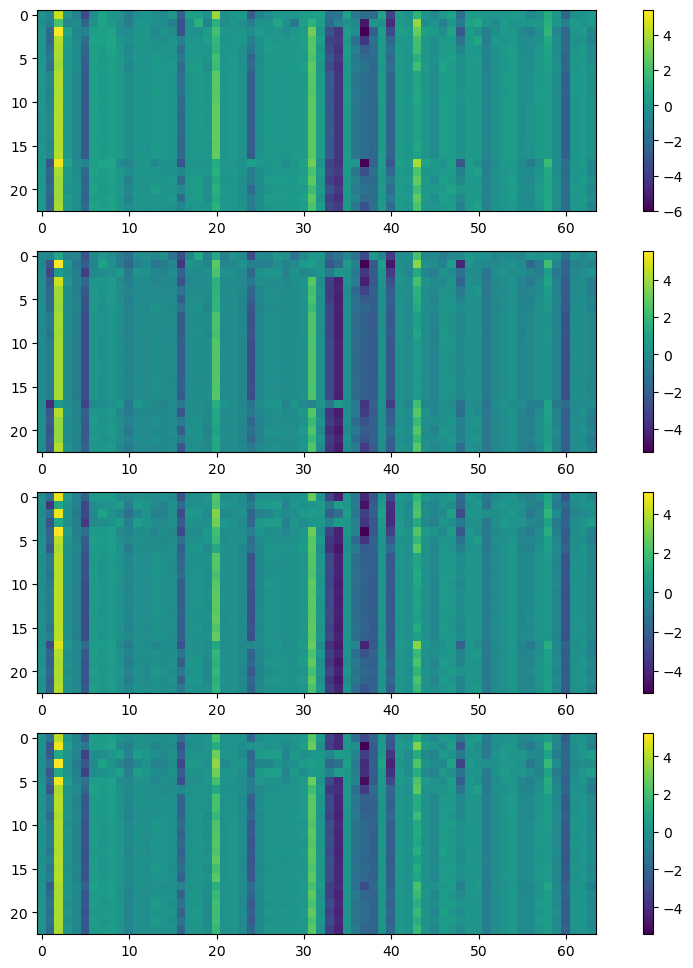

In [14]:
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(all_Ev[0].reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

## Now we dive into the details for interesting ones

In [ ]:
all_scores, all_E, all_Ev, batch = extractor(
    '(Q+K+E_multi)*(V+E_multi)_DptConn_noHeads_DoubleScaling_4seeds'
)

In [ ]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

In [ ]:
plt.figure(figsize=(12,12))
for idx in range(4):
    loc_scores = all_scores[0].reshape(32, 31, 31, -1)
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==idx][1].numpy()
    transparency = np.ones(23) * 6 # 6
    transparency[neighbors] += 2 # 8
    transparency = np.repeat(transparency.reshape(-1,1), repeats=loc_scores.shape[-1], axis=1)
    plt.subplot(4,1,idx+1)
    try:
        plt.imshow(loc_scores[1,idx,:23,:].numpy(), alpha=transparency*.1)
    except:
        print(idx)
    #plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

## Publishable version

In [ ]:
plt.figure(figsize=(12,12))
for idx in range(4):
    loc_scores = all_scores[0].reshape(32, 31, 31, -1)
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==idx][1].numpy()
    transparency = np.ones(23) * 6 # 6
    transparency[neighbors] += 2 # 8
    transparency = np.repeat(transparency.reshape(-1,1), repeats=loc_scores.shape[-1], axis=1)
    plt.subplot(4,1,idx+1)
    plt.imshow(loc_scores[1,idx,:23,:].numpy(), alpha=transparency*.1)
    #plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))